<a href="https://colab.research.google.com/github/ankuj/teaching/blob/main/Day_2_WordEmbedding(GloVe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://i.imgur.com/a3uAqnb.png)

# Natural Language Processing (NLP)
# Third : Word embeddings
---

## 🔍 Sparse vs. Dense Vectors in NLP

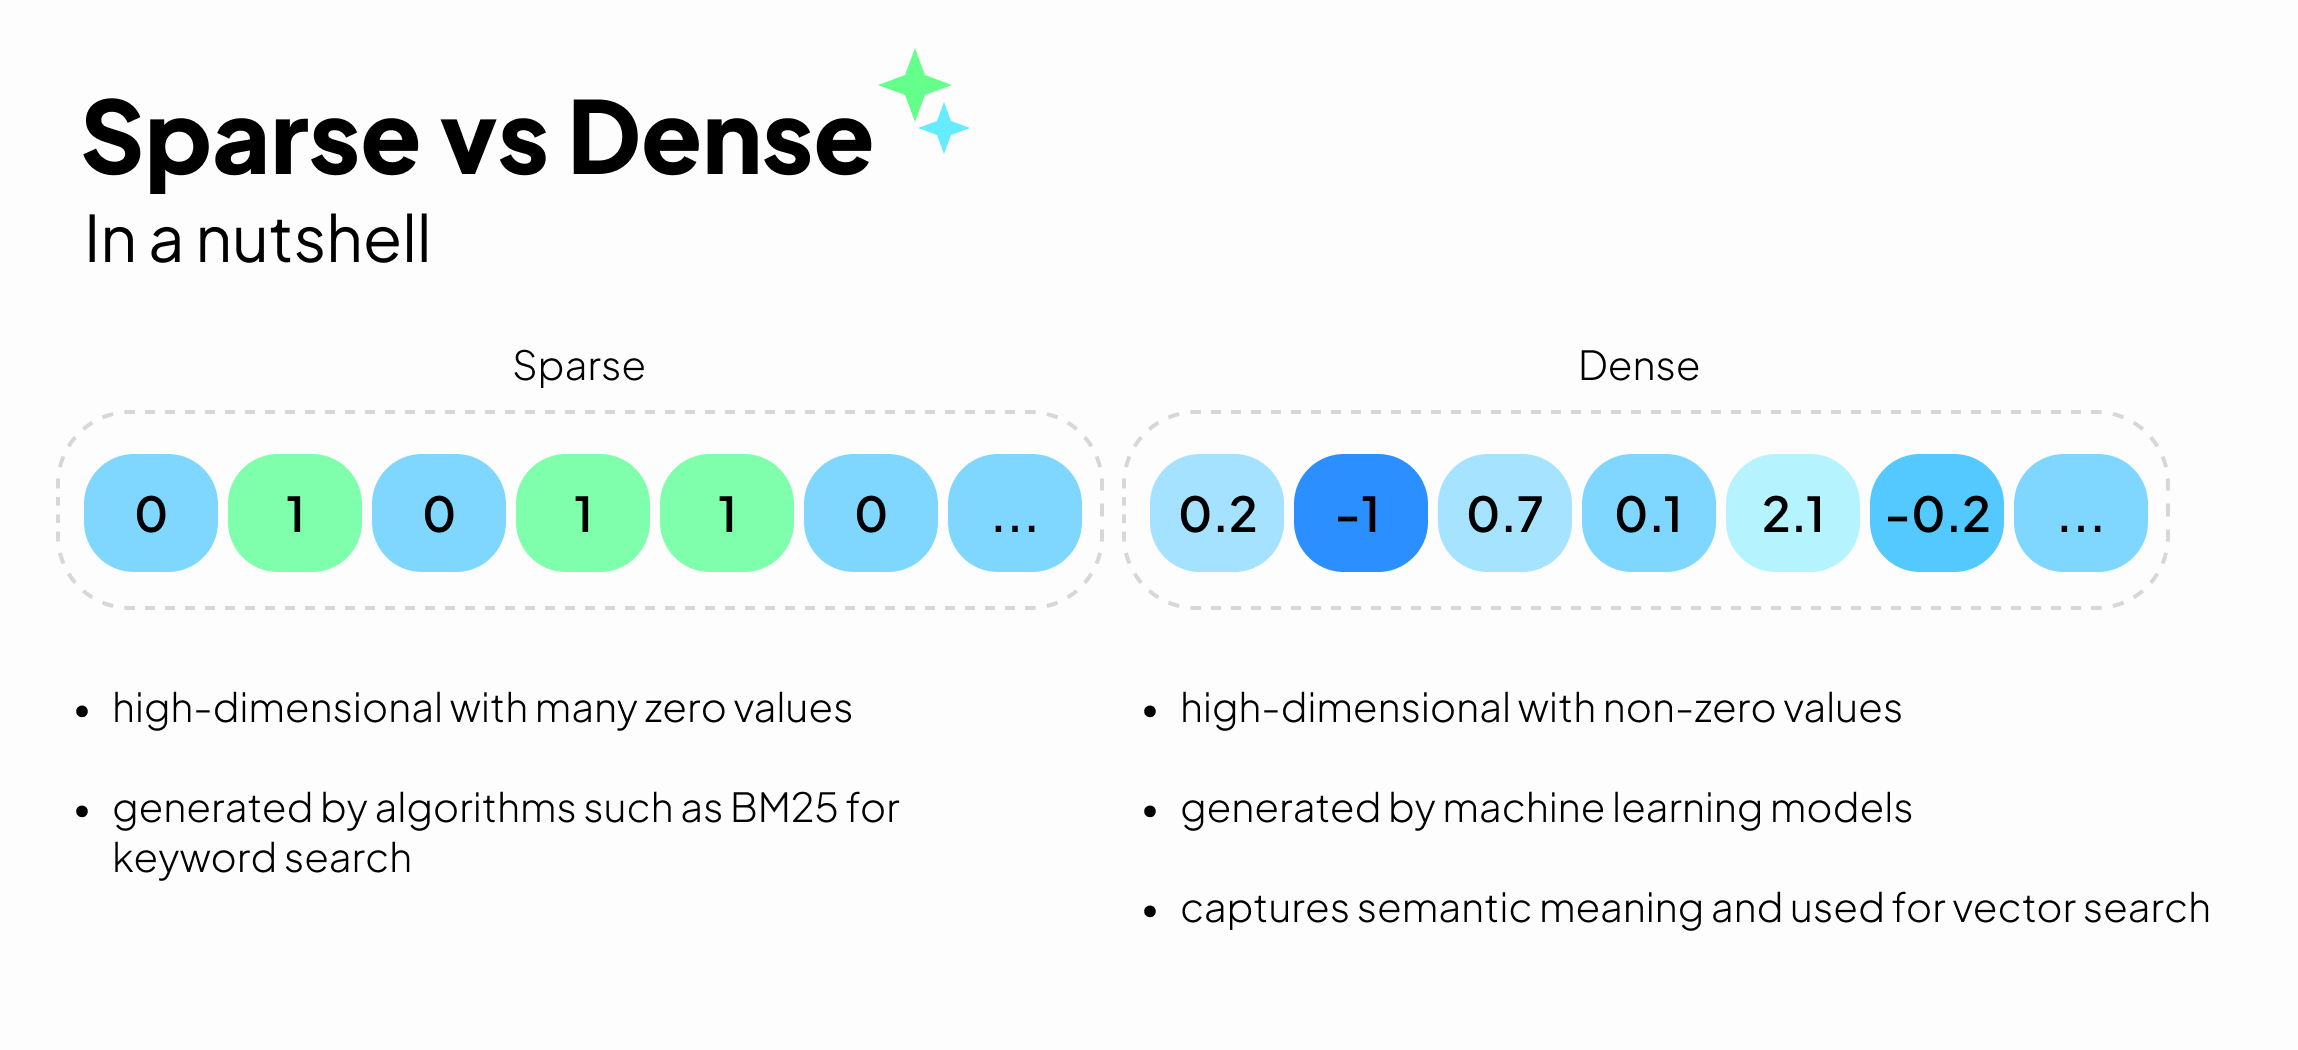
### 📌 What are Sparse Vectors?

- **Sparse vectors** are vectors where **most of the values are zero**.
- This is what happens in models like:
  - **Bag of Words (BoW)**
  - **TF-IDF**
- The length of the vector equals the size of the **entire vocabulary** (which can be tens of thousands of words).
- Only the positions corresponding to the words in the document have non-zero values.

✅ Example (Sparse BoW Vector):

| Word         | apple | love | machine | learning | AI  | ... | zebra |
|-------------|-------|------|---------|----------|-----|-----|-------|
| Document 1  | 1     | 1    | 1       | 1        | 0   | ... | 0     |

- This vector is mostly **zeros** → **sparse**.

---

### 📌 What are Dense Vectors?

- **Dense vectors** have **no zeros (or very few zeros)**—every element carries some numerical value.
- These are used in:
  - **Word2Vec**
  - **GloVe**
  - **FastText**
- Each word is represented as a **fixed-length dense vector** (e.g., 100 or 300 dimensions) regardless of vocabulary size.

✅ Example (Dense Word Embedding Vector):

| Dimension 1 | Dimension 2 | Dimension 3 | ... | Dimension 100 |
|------------|-------------|-------------|-----|---------------|
| 0.25       | -0.17       | 0.03        | ... | 0.41          |

- All values are **non-zero** → **dense**.

---

### ✅ Key Differences:

| Feature                    | Sparse Vectors (BoW, TF-IDF) | Dense Vectors (Embeddings)  |
|----------------------------|------------------------------|-----------------------------|
| Size of vector              | Equal to vocabulary size (huge) | Fixed size (e.g., 100, 300) |
| Values                      | Mostly zeros                 | Continuous real numbers      |
| Captures similarity?        | ❌ No                         | ✅ Yes                       |
| Memory efficiency           | ❌ Poor (very large)           | ✅ Good (compact)            |
| Examples                    | BoW, TF-IDF                  | Word2Vec, GloVe, FastText    |

---




# 📚 1-GloVe Word Embeddings: Mathematical Foundations

---

## 📌 What is GloVe?

**GloVe (Global Vectors for Word Representation)** is an unsupervised learning algorithm for generating **word embeddings** by leveraging **global statistical information** from a corpus.

Unlike Word2Vec, which predicts words based on local context, GloVe builds embeddings by analyzing the **co-occurrence of words** across the **entire corpus**.

---

## 1️⃣ Co-occurrence Matrix

- Let **X** be the **co-occurrence matrix** where:
  - $$ X_{ij} $$ represents the number of times **word j** appears in the context of **word i**.
  - The context is typically defined as a **fixed window of words** around the target word.

- The **total co-occurrences** for word **i**:
$$
X_i = \sum_{k} X_{ik}
$$

---

### 📝 Example Corpus:

> “I don't like KFC”  
> “I don't like Oxford coffee”  
> “I enjoy Oxford nature”

**Vocabulary:**  
{ I, don't, like, KFC, Oxford, coffee, enjoy, nature }

---

### 🏗 Step-by-Step Construction:

✅ **Context Window = 1 word** on each side

| Word      | Context Words                            |
|-----------|------------------------------------------|
| I         | don't, enjoy                             |
| don't     | I, like                                  |
| like      |                                          |
| KFC       |                                          |
| Oxford    |                                          |
| coffee    |                                          |
| nature    |                                          |

---

### 🔢 Co-occurrence Matrix \( X \) (Partial View):

|        | I  | don't | like | KFC | Oxford | coffee | nature |
|--------|----|------|------|----------|-----|-------|--------|
| **I**      | 0  | 2    | 0    | 0        | 0   | 1     | 0      |
| **don't**   | 2  | 0    | 1    | 0        | 1   | 0     | 0      |
| **like**   | 0  | 1    | 0    | 1        | 0   | 0     | 0      |
| **KFC** | 0 | 0   | 1    | 0        | 0   | 0     | 0      |
| **Oxford**    | 0  | 1    | 0    | 0        | 0   | 0     | 0      |
| **coffee**  | 1  | 0    | 0    | 0        | 0   | 0     | 1      |
| **nature** | 0  | 0    | 0    | 0        | 0   | 1     | 0      |

---

## 2️⃣ GloVe Objective Function

GloVe learns word vectors by minimizing this objective:

$$
J = \sum_{i,j=1}^{V} f(X_{ij}) \left( w_i^T \tilde{w}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2
$$

Where:

| Symbol        | Meaning                                        |
|--------------|-----------------------------------------------|
| $$ V $$       | Vocabulary size                                |
| $$ w_i $$     | Word vector for **target word i**              |
| $$ \tilde{w}_j $$ | Word vector for **context word j**         |
| $$ b_i $$     | Bias for target word                           |
| $$ \tilde{b}_j $$ | Bias for context word                      |
| $$ f(X_{ij}) $$ | Weighting function controlling impact of each co-occurrence |

---

## 3️⃣ Weighting Function $$ f(X_{ij}) $$

To prevent very rare or overly frequent co-occurrences from dominating learning, GloVe uses a weighting function:

$$
f(X_{ij}) =
\begin{cases}
\left( \frac{X_{ij}}{X_{max}} \right)^{\alpha} & \text{if } X_{ij} < X_{max} \\
1 & \text{otherwise}
\end{cases}
$$

- $$ X_{max} $$ = maximum cap on counts (hyperparameter)
- $$ alpha $$ = typically 0.75

---

## 4️⃣ Training and Gradient Descent

- GloVe uses **Stochastic Gradient Descent (SGD)** to update:
  - Word vectors $$ w_i $$ and $$ \tilde{w}_j $$
  - Biases $$ b_i $$ and $$ \tilde{b}_j $$

The partial derivatives of the loss with respect to vectors and biases are computed and updated iteratively.

---

## 5️⃣ Final Word Vectors

After training:
- Each word has two vectors: **target vector** and **context vector**.
- The **final word embedding** is usually the **sum** of both vectors:
$$
v_i = w_i + \tilde{w}_i
$$

---

## ✅ Summary of GloVe:

| Feature                | GloVe Embedding Characteristics          |
|------------------------|-----------------------------------------|
| Uses co-occurrence?     | ✅ Yes (global statistics)              |
| Predicts context?       | ❌ No (unlike Word2Vec)                 |
| Embedding type          | **Dense vectors**                      |
| Captures word similarity? | ✅ Yes                                 |
| Training method         | Weighted least squares + SGD           |

---



In [ ]:
!pip install scikit-learn pandas gensim numpy

In [ ]:
# Importing necessary libraries
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
from gensim.test.utils import datapath, get_tmpfile  # Importing utility functions from gensim
from gensim.models import KeyedVectors  # Importing KeyedVectors for handling word vectors
from gensim.scripts.glove2word2vec import glove2word2vec  # Importing function to convert GloVe format to word2vec
import gensim.downloader as api  # Importing gensim downloader to load pre-trained models

In [ ]:
# Load GloVe word vectors
# Gensim has functionality to download a pre-trained model and load it. We use the 100d vectors below.
model = api.load('glove-wiki-gigaword-100')  # Loading pre-trained GloVe vectors with 100 dimensions

[==================================================] 100.0% 128.1/128.1MB downloaded


Task 3: Dense Embeddings

In [ ]:
print("\nTask 3: Look up the GloVe embeddings for the following words: ['I','don't','like', 'KFC']")

# 🔍 Understanding `model.most_similar` in Word2Vec

---

## 📌 What Does `most_similar` Do?

The `model.most_similar()` function in **Word2Vec** finds the words whose embeddings are **most similar** to a **vector combination** of given words.

---

## ✅ Parameters:

| Parameter | Description | Example |
|-----------|-------------|---------|
| `positive` | Words (or weighted word tuples) that contribute **positively** to the result | `['king', 'woman']` or `[('king', 0.8), ('queen', 0.2)]` |
| `negative` | Words (or weighted word tuples) that contribute **negatively** | `['man']` or `[('man', 1.0)]` |
| `topn` | Number of most similar words to return | `topn=10` (default) |

---

## 🧮 Mathematical Explanation

The function performs **vector arithmetic** using the embeddings of the specified words.

### Example:

Given the word vectors:
- $$ \vec{v}_{\text{king}} $$
- $$ \vec{v}_{\text{man}} $$
- $$ \vec{v}_{\text{woman}} $$

The new vector \( \vec{v} \) is computed as:

$$
\vec{v} = \vec{v}_{\text{king}} + \vec{v}_{\text{woman}} - \vec{v}_{\text{man}}
$$

This new vector captures the **semantic concept** that relates these words (e.g., "queen").

---

## 📏 Cosine Similarity Formula:

To find the closest words to this new vector, the model calculates the **cosine similarity** between vectors.

The cosine similarity between two vectors \( \vec{a} \) and \( \vec{b} \) is defined as:

$$
\text{cosine\_similarity}(\vec{a}, \vec{b}) = \frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\| \times \|\vec{b}\|}
$$

Where:

- $$ \vec{a} \cdot \vec{b} $$ is the **dot product** of the two vectors.
- $$ \|\vec{a}\| $$ is the **Euclidean norm (magnitude)** of vector \( \vec{a} \).
- $$ \|\vec{b}\| $$ is the **Euclidean norm (magnitude)** of vector \( \vec{b} \).


---


# 📝 Exercise: Exploring Word Similarities with GloVe

---

## 🎯 Task 4: Exploring Word Similarities

In this task, you will use a **pre-trained GloVe model** to explore how words are related in semantic space.

---

### ✅ Instructions:

1. **Load the Pre-trained GloVe Model**
   - You can use `gensim` to load GloVe embeddings (either convert `.txt` to Word2Vec format or use pre-converted versions).
   - Recommended: Use **glove.6B.100d** (100-dimensional vectors).

2. **Explore Word Similarities**
   - For each of the following words:
     - `"coffee"`
     - `"oxford"`
     - `"chicken"`
   - Find and display the **top 5 most similar words** based on cosine similarity.

---

### ✅ Your Goals:

| Target Word    | Task                                        |
|---------------|---------------------------------------------|
| `"coffee"`      | List the **top 5 most similar words**      |
| `"oxford"`   | List the **top 5 most similar words**      |
| `"chicken"` | List the **top 5 most similar words**      |

---

### ✅ Expected Output (Example for `"coffee"`):

| Rank | Similar Word | Similarity Score |
|------|--------------|------------------|
| 1    | ...          | ...              |
| 2    | ...          | ...              |
| 3    | ...          | ...              |
| 4    | ...          | ...              |
| 5    | ...          | ...              |

---




Task 4: Sentence Similarity Using Average Word Embeddings

In [ ]:
print("\nTask 5: Compute similarity between sentences 'I don't like KFC' and 'There is nothing to do in Oxford' using averaged GloVe embeddings")

# 🔍 Understanding `model.doesnt_match` in Word2Vec

---

## 📌 What Does `doesnt_match` Do?

The `model.doesnt_match()` function in **Word2Vec** identifies the word in a given list that **does not belong** to the same semantic context as the others.

It detects the **semantic outlier**—the word that is least similar to the pattern shared by the rest.

---

## ✅ Parameters:

| Parameter        | Description                                                   | Example                              |
|------------------|---------------------------------------------------------------|--------------------------------------|
| `list_of_words`  | A list of words where one word doesn't fit the common context | `['apple', 'banana', 'grape', 'car']` |

---

## 🔄 Mathematical Explanation

Given a list of **n word vectors**:

$$
\left\{ \vec{v}_1, \vec{v}_2, \ldots, \vec{v}_n \right\}
$$

---

### 1️⃣ Compute the Mean Vector:

The **mean vector** represents the **average semantic meaning** of the group of words:

$$
\vec{v}_{\text{mean}} = \frac{1}{n} \sum_{i=1}^{n} \vec{v}_i
$$

---

### 2️⃣ Compute Cosine Similarity:

For each word vector \( \vec{v}_i \), compute the **cosine similarity** with the mean vector \( \vec{v}_{\text{mean}} \):

$$
\text{cosine\_similarity}(\vec{v}_i, \vec{v}_{\text{mean}}) = \frac{\vec{v}_i \cdot \vec{v}_{\text{mean}}}{\|\vec{v}_i\| \times \|\vec{v}_{\text{mean}}\|}
$$

Where:

- The numerator:  
  $$ \vec{v}_i \cdot \vec{v}_{\text{mean}} $$  
  → This is the **dot product** between the word vector and the mean vector.

- The denominator:  
  $$ \|\vec{v}_i\| \times \|\vec{v}_{\text{mean}}\| $$  
  → These are the **Euclidean norms (magnitudes)** of the vectors.

---

### 3️⃣ Identify the Outlier:

- The word with the **lowest cosine similarity** to the mean vector is selected as the **odd one out**.
- This word is considered the **least semantically related** to the others in the list.

---



# 📝 Exercise: Task 6 — Finding Out-of-Context Words with GloVe

---

## 🎯 Objective:

In this task, you will use **Word2Vec’s `doesnt_match` function** to identify the word that **does not belong** to the group in each of the following lists.

The goal is to find the **semantic outlier**.

---

## ✅ Your Word Lists:

| Set | Words                                        | Expected Outlier (Example) |
|-----|----------------------------------------------|----------------------------|
| 1   | ["rice", "wheat", "cereal", "oxford"]            | "oxford" (not a food)       |
| 2   | ["oxford", "cambridge", "london", "car"]                | "car" (not a city)       |
---